# **CS 5361/6361 Machine Learning**

**Decision Trees**

**Author:** [Olac Fuentes](http://www.cs.utep.edu/ofuentes/)<br>
**Last modified:** 9/18/2023<br>

A decision tree is a classification model consisting of a flowchart-like structure in which each internal node represents an attribute, each branch represents an attribute value, and each leaf node represents a class label.


A decision tree:

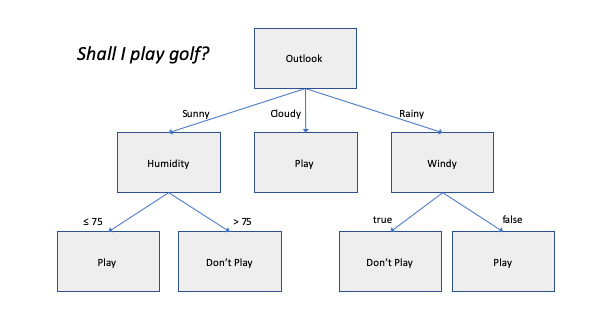

Decision trees offer a simple and human-understandable way of performing classifcation.

In machine learning, we are interested in developing algorithms for infering decision trees from data.

**When to use decision trees?**

<ul>
  <li>Instances describable by attribute-value pairs</li>
  <li>Target function is discrete valued (classification tasks)</li>
  <li>Disjunctive hypothesis may be required</li>
  <li>Training data may be noisy</li>
  <li>Data may contain missing attribute values</li>
  <li>Model understandability by people may be required</li>
  <li>Target function may depend only on a small subset of attributes</li>
</ul>

Most commonly available implementations for learning learning decision trees from data are based on the ID3 algortihm introduced by Quinlan. https://link.springer.com/article/10.1007/BF00116251


Here's a description in Python-like pseudocode of the ID3 algorithm.

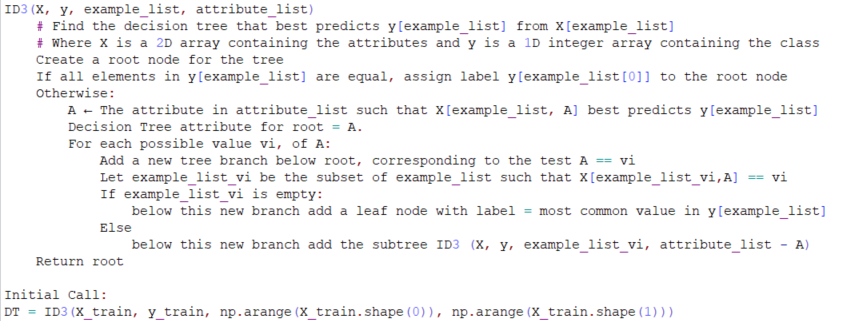

How do we find A?

A ← The attribute in attribute_list such that X[example_list, A] best predicts y[example_list]

Let's consider a binary classification case.

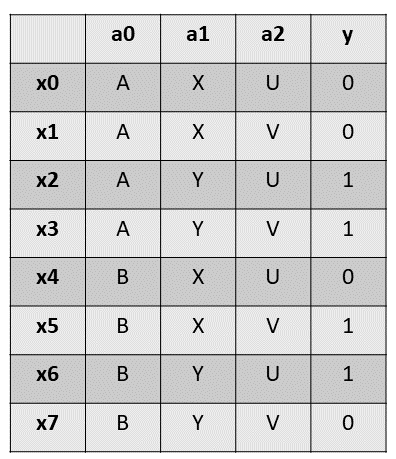

We want to build a decision tree to predict *y* given examples *x0,...,x7* with attribute values *a0, a1, a2*.

Thus X_train would be the array consisting off all rows the the first three columns in the table and y_train would be the last columns in the table.

The call to ID3 would be:

DT = ID3(X_train, y_train, [0,1,2,3,4,5,6,7],[0,1,2])

Which attibute should we choose for the root of the decision tree?

y_train[example_list] has 4 elements belonging to class 1 and 4 elements belonging to class 0.

We will represent this as [4+, 4-]

Suppose we have a classifier that simply predicts the majority class for all test examples.  For the data above, such classifier would have an accuracy of 0.5

Now consider the splits we would obtain with each of the attributes a0, a1, a2.

If we split the data according to **a0**:

The labels (or y values) of examples for which a0==A are:

[2+,2-]

so the accuracy of a majority classifier would be 0.5 on this subset of the data.

The labels (or y values) of examples for which a0==B are:

[2+,2-]

so the accuracy of a majority classifier would also be 0.5 on this subset of the data.

If we split the data according to **a1**:

The labels (or y values) of examples for which a1==X are:

[1+,3-]

so the accuracy of a majority classifier would be 0.75 on this subset of the data.

The labels (or y values) of examples for which a1==Y are:

[3+,1-]

so the accuracy of a majority classifier would also be 0.75 on this subset of the data.

If we split the data according to **a2**:

The labels (or y values) of examples for which a2==U are:

[2+,2-]

so the accuracy of a majority classifier would be 0.5 on this subset of the data.

The labels (or y values) of examples for which a2==V are:

[2+,2-]

so the accuracy of a majority classifier would also be 0.5 on this subset of the data.

Intuitively, it seems like a1 is the best attribute for the root of the decision tree.

**Entropy and information gain**

Formally, we chose the attribute that results in the largest information gain.

The gain of attribute A over datset S is given by:

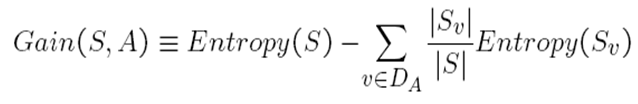

where *|S|* is the cardinality (or size) of *S*, *Sv* is the subset of *S* consisting of the labels of examples for which attribute *A* has value *v*.

Let *S* be a set of binary labels. The entropy of *S* is given by:

*ent(S) = - p(0) log2 p(0) - p(1) log2 p(1)*

where *p(0)* is the probability that a randomly-chosen element of *S* will have value *0*, or equivalently, the number of elements of *S* that have value *0* divided by the number of elements of *S*.


In [ ]:
import numpy as np
def entropy(S):
  p1 = np.mean(S)
  p0 = 1-p1
  if p0==0 or p1==0:
    return 0
  return -p0*np.log2(p0) - p1*np.log2(p1)

In [ ]:
S = [0,0,0,0,1,1,1,1]
entropy(S)

1.0

In [ ]:
S = [0,0,0,0]
entropy(S)

0

In [ ]:
S = [1,1,1,1]
entropy(S)

0

In [ ]:
S = [0,1,1,1]
entropy(S)

0.8112781244591328

In [ ]:
S = [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
entropy(S)

0.18312206830137284

In [ ]:
def entropy_from_p1(p1):
  p0 = 1-p1
  if p0==0 or p1==0:
    return 0
  return -p0*np.log2(p0) - p1*np.log2(p1)

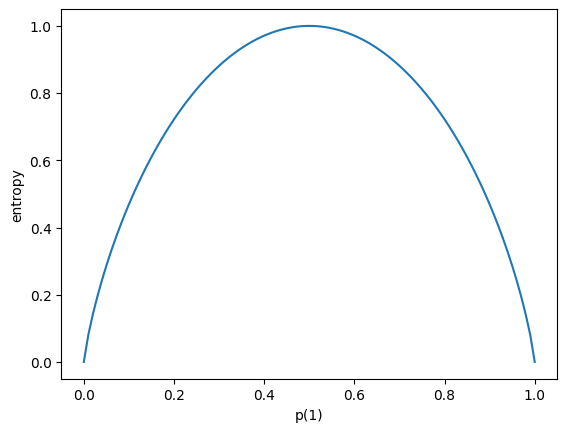

In [ ]:
import matplotlib.pyplot as plt

p1 = np.linspace(0,1,100) # Generates 100 values from 0 to 1, unifirmly spaced

ent = []
for p in p1:
  ent.append(entropy_from_p1(p))

plt.plot(p1,ent)
plt.xlabel('p(1)')
plt.ylabel('entropy')
plt.show()


For the example above:

For attribute **a0**:

Gain((X,y),a0) = entropy(0.5) - 4/8 entropy(0.5) - 4/8 entropy(0.5)

In [ ]:
G = entropy_from_p1(0.5) - (4/8)*entropy_from_p1(0.5) - (4/8)*entropy_from_p1(0.5)
print(G)

0.0


For attribute **a1**:

Gain((X,y),a1) = entropy(0.5) - 4/8 entropy(0.25) - 4/8 entropy(0.75)

In [ ]:
G = entropy_from_p1(0.5) - (4/8)*entropy_from_p1(0.25) - (4/8)*entropy_from_p1(0.75)
print(G)

0.1887218755408671


For attribute **a2**:

Gain((X,y),a0) = entropy(0.5) - 4/8 entropy(0.5) - 4/8 entropy(0.5)

In [ ]:
G = entropy_from_p1(0.5) - (4/8)*entropy_from_p1(0.5) - (4/8)*entropy_from_p1(0.5)
print(G)

0.0


In [ ]:
entropy_from_p1(0.25)

0.8112781244591328

In [ ]:
np.mean([0.1,0.15,3.4,3.2,3.3,3.1])

2.208333333333333

Thus **a1** is the attribute that maximizes information gain.

For the recursive calls, we would split the dataset according to **a1**.

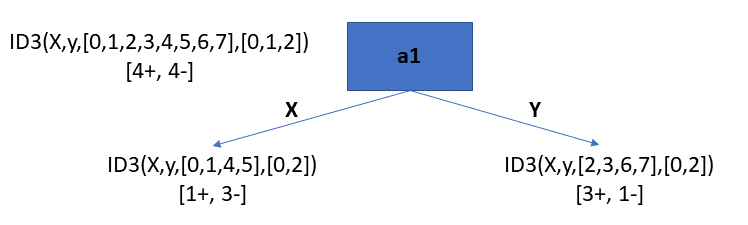

Using the table repesentation of the data received by ID3, we can visualize how data are split, trying to separe the data into subsets that have the same y value.

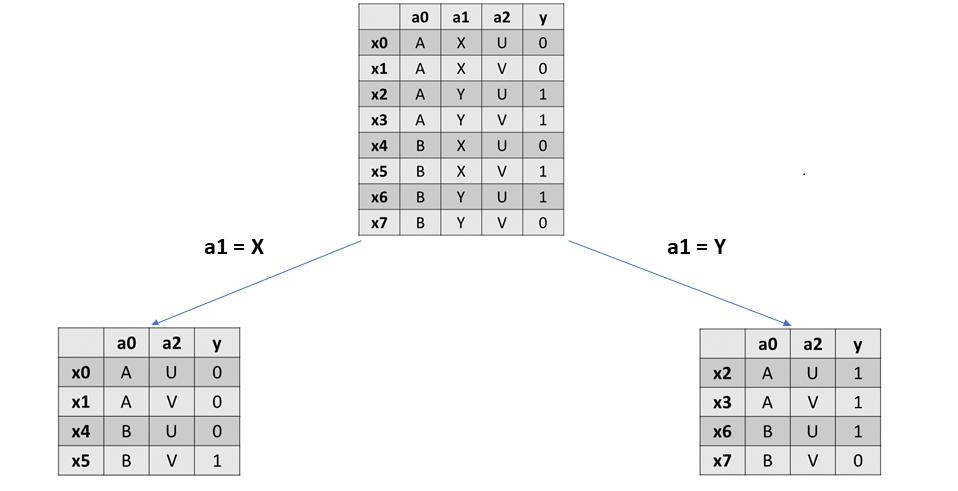

Considering the left child of the root, we need to chose between attributes **a0** and **a2**.

For **a0**:




In [ ]:
G = entropy_from_p1(0.25) - (2/4)*entropy_from_p1(0) - (2/4)*entropy_from_p1(0.5)
print(G)

0.31127812445913283


For **a2**:

In [ ]:
G = entropy_from_p1(0.25) - (2/4)*entropy_from_p1(0) - (2/4)*entropy_from_p1(0.5)
print(G)

0.31127812445913283


Since we have a tie, we can pick arbitrarily; we choose **a0**:

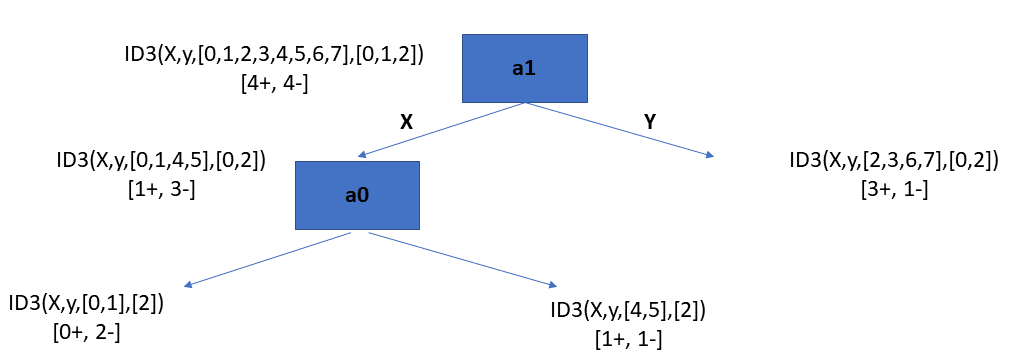

Visualizing data using tables:

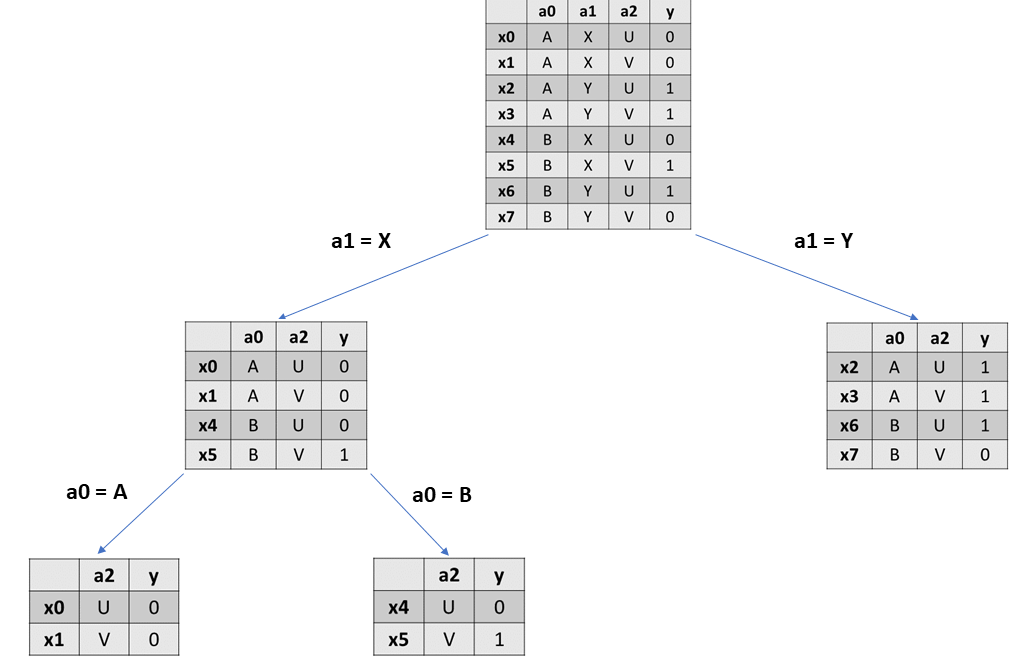

In the next recursive call, ID3((X,y),[0,1],[2]), the base case applies, since all examples belong to the same class. Thus we return a leaf node with label 0.

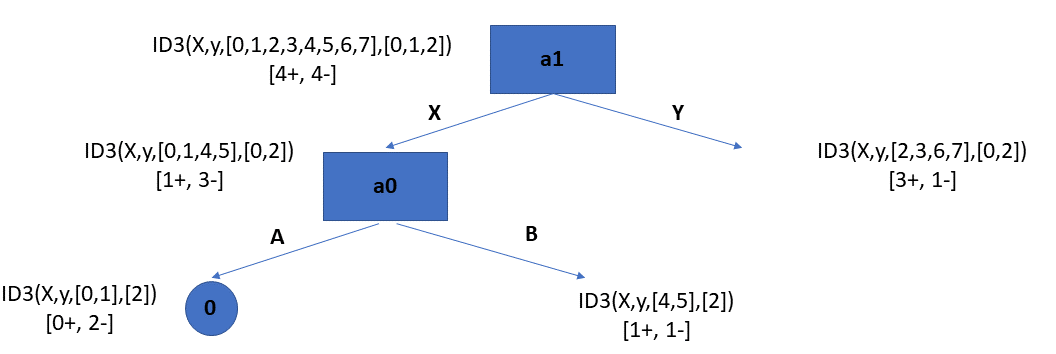

In the next recursive call, ID3((X,y),[4,5],[2]), we split accoring to the only attribute left and obtain:

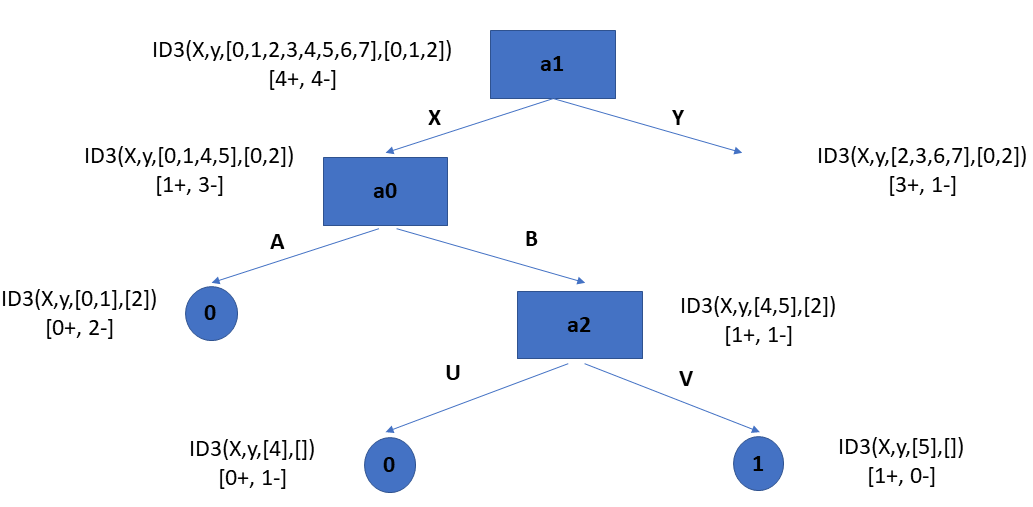

After

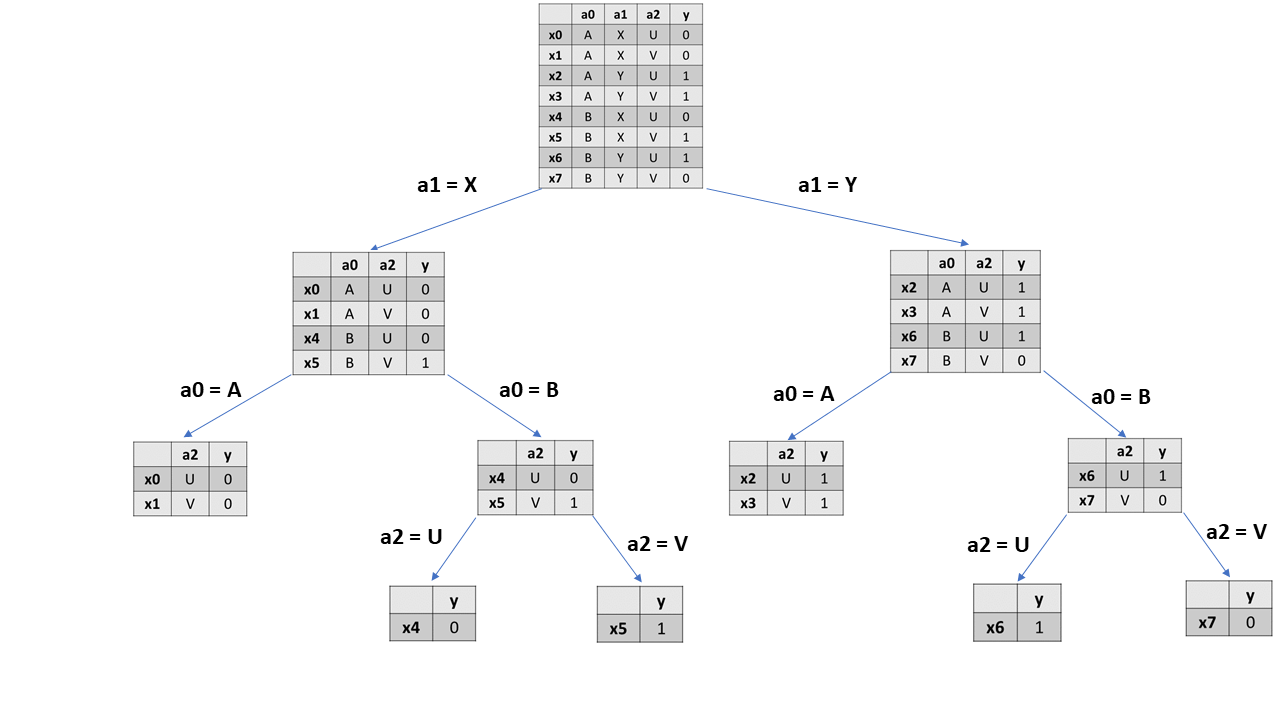

# **Decision trees with sklearn**

Sklearn provides an implementation of decision trees based on ID3. The documentation can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
from sklearn.tree import DecisionTreeClassifier


The implementation only allows for numeric data. To reproduce the results above, we need to transform our dataset. Since each attribute has two possible values, we will use 0 and 1 in our representation. We will replace A, X and U by 0 and B,Y and V by 1.

In [ ]:
X= np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
y = np.array([0,0,1,1,0,1,1,0])
print(X)
print(y)

[[0 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 1]
 [1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]
[0 0 1 1 0 1 1 0]


Since we use entropy as our splitting criterion, we will use that for this tree. We can also restrict the maximum depth of nodes in the tree. When ID3 reaches the maximum depth, it stops splitting and returns a leaf with the most common label in the data it receives.

In [ ]:
max_depth=1
model = DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)

We will also use sklearn and matplotlib functions to display the tree.

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

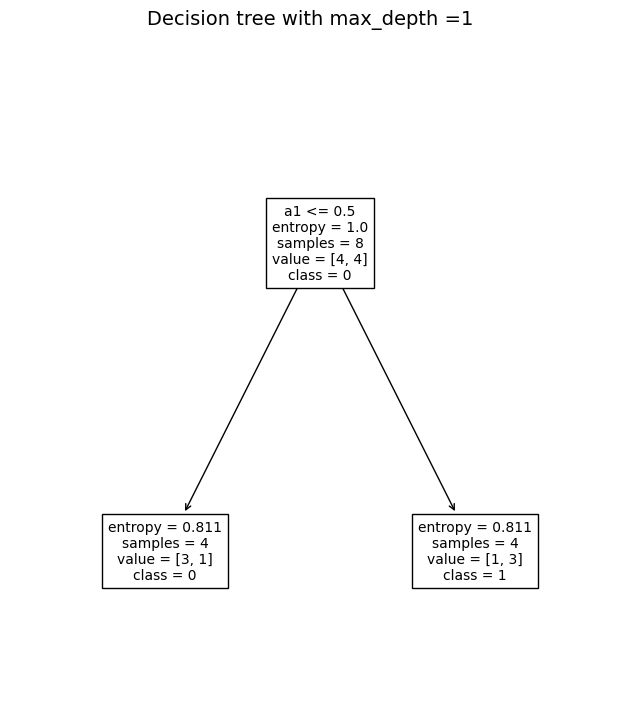

In [ ]:
max_depth=1
model = DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)
model = model.fit(X, y)
fig, ax = plt.subplots(figsize=(8,8))
t = tree.plot_tree(model, feature_names=['a0','a1','a2'],fontsize=10, ax=ax,class_names=['0','1'])
s=fig.suptitle('Decision tree with max_depth ={}'.format(max_depth), fontsize=14)

We can see that the attribute choice (a1) matches our example. We can also verify that the entropy calculations match ours.

In [ ]:
entropy_from_p1(0.5)

1.0

In [ ]:
entropy_from_p1(0.75)

0.8112781244591328

Let's now increase the maximum depth.

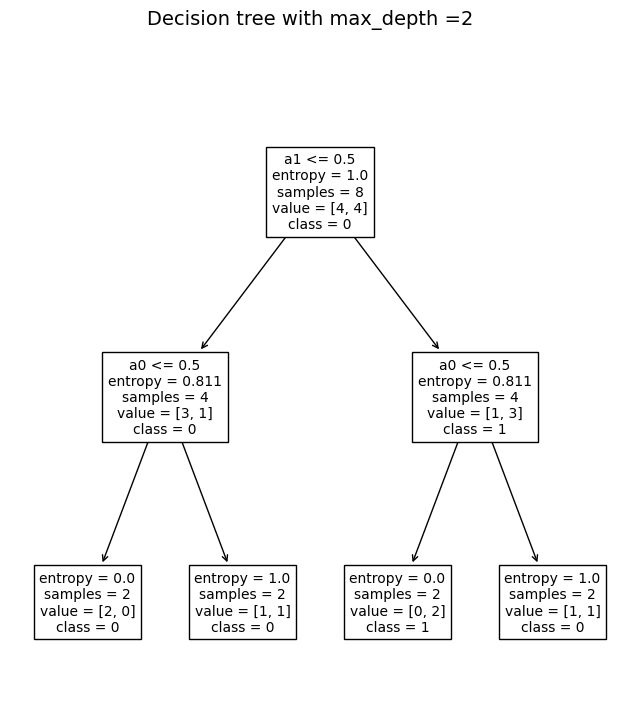

In [ ]:
max_depth=2
model = DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)
model = model.fit(X, y)
fig, ax = plt.subplots(figsize=(8,8))
t = tree.plot_tree(model, feature_names=['a0','a1','a2'],fontsize=10, ax=ax,class_names=['0','1'])
s=fig.suptitle('Decision tree with max_depth ={}'.format(max_depth), fontsize=14)

As in our example, two of the leaves have 0 entropy, with all examples belonging to the same class, so not further splits would happen even if we increased the depth.

Now let's increase the maximum depth to 3.

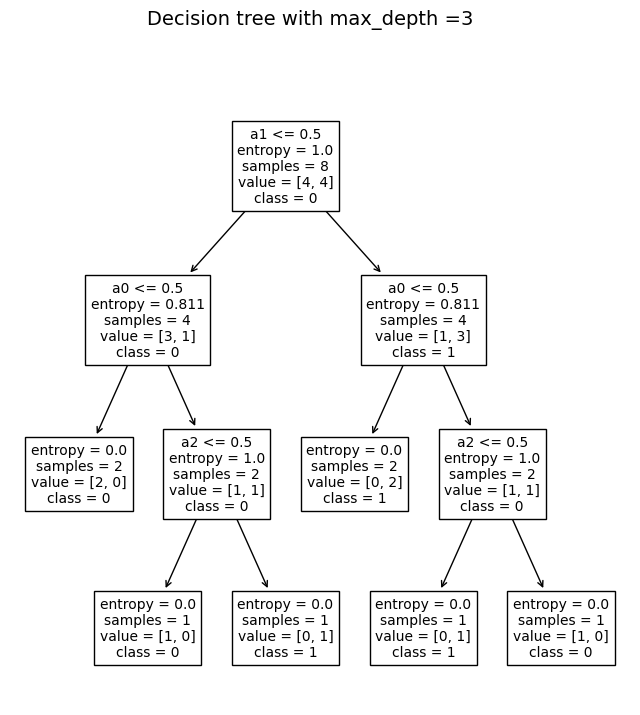

In [ ]:
max_depth=3
model = DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)
model = model.fit(X, y)
fig, ax = plt.subplots(figsize=(8,8))
tree.plot_tree(model, feature_names=['a0','a1','a2'],fontsize=10, ax=ax,class_names=['0','1'])
s=fig.suptitle('Decision tree with max_depth ={}'.format(max_depth), fontsize=14)

This produces the same tree we build in our example.

Notice that increasing the maximum depth further has no effect, since all leaves have 0 entropy.

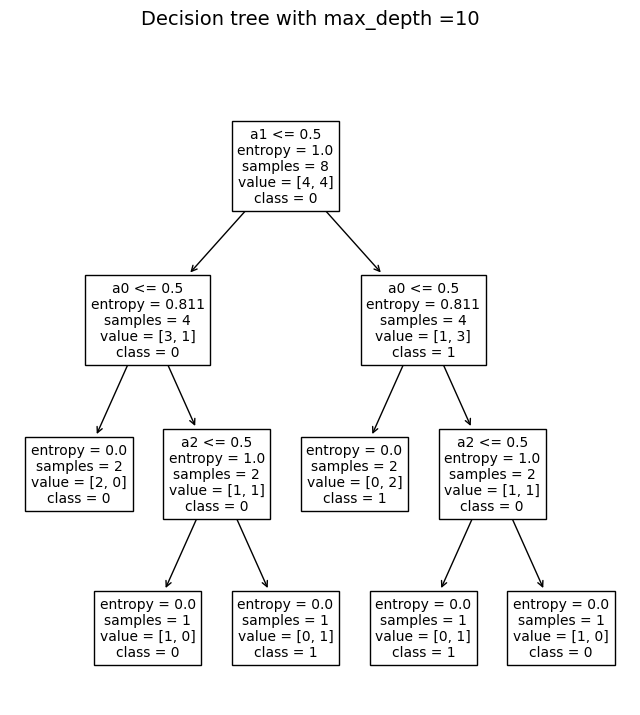

In [ ]:
max_depth=10
model = DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)
model = model.fit(X, y)
fig, ax = plt.subplots(figsize=(8,8))
tree.plot_tree(model, feature_names=['a0','a1','a2'],fontsize=10, ax=ax,class_names=['0','1'])
s=fig.suptitle('Decision tree with max_depth ={}'.format(max_depth), fontsize=14)

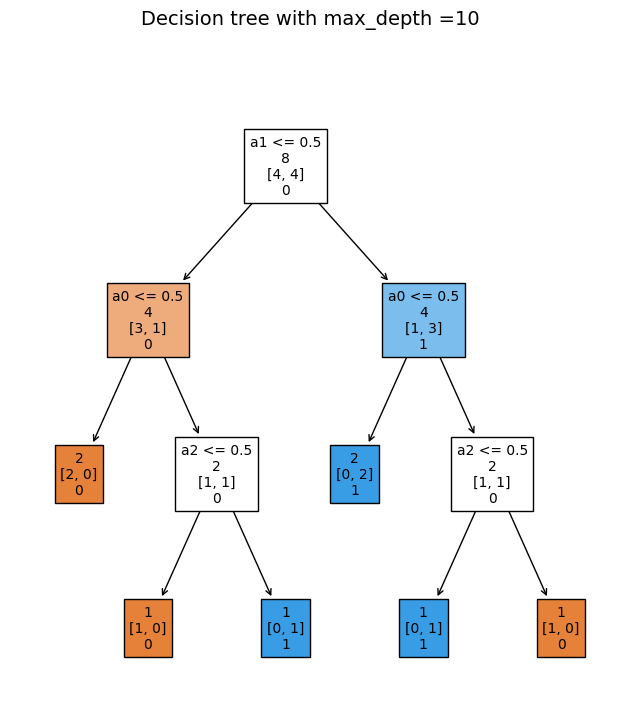

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
tree.plot_tree(model, feature_names=['a0','a1','a2'],fontsize=10, ax=ax,class_names=['0','1'],label='none',impurity=False,filled=True)
s=fig.suptitle('Decision tree with max_depth ={}'.format(max_depth), fontsize=14)

## Classifying the Iris dataset

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

dataset = load_iris()
x = dataset.data
y = dataset.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=5361)

In [ ]:
model = DecisionTreeClassifier(criterion='entropy')
model = model.fit(x_train, y_train)
pred = model.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print(f'Accuracy {accuracy:.4}')
cm = confusion_matrix(y_test, pred)
print(cm)

Accuracy 0.9667
[[ 7  0  0]
 [ 0 14  0]
 [ 0  1  8]]


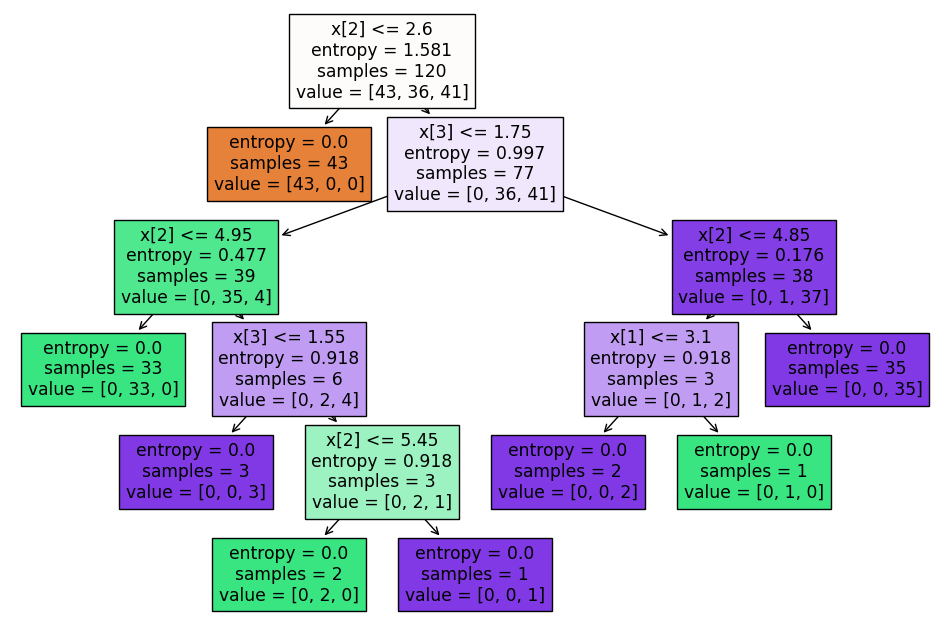

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
t = tree.plot_tree(model, label='all',filled=True)

In [ ]:
y_test

array([1, 2, 1, 2, 1, 1, 2, 0, 2, 1, 0, 0, 1, 1, 2, 1, 0, 1, 2, 2, 1, 0,
       0, 1, 1, 2, 0, 2, 1, 1])

In [ ]:
pred = model.predict(x_test)

In [ ]:
np.argmax(pred!=y_test)

14

In [ ]:
print(pred[14],y_test[14])

1 2


In [ ]:
pred!=y_test

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
pred

array([1, 2, 1, 2, 1, 1, 2, 0, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0,
       0, 1, 1, 2, 0, 2, 1, 1])

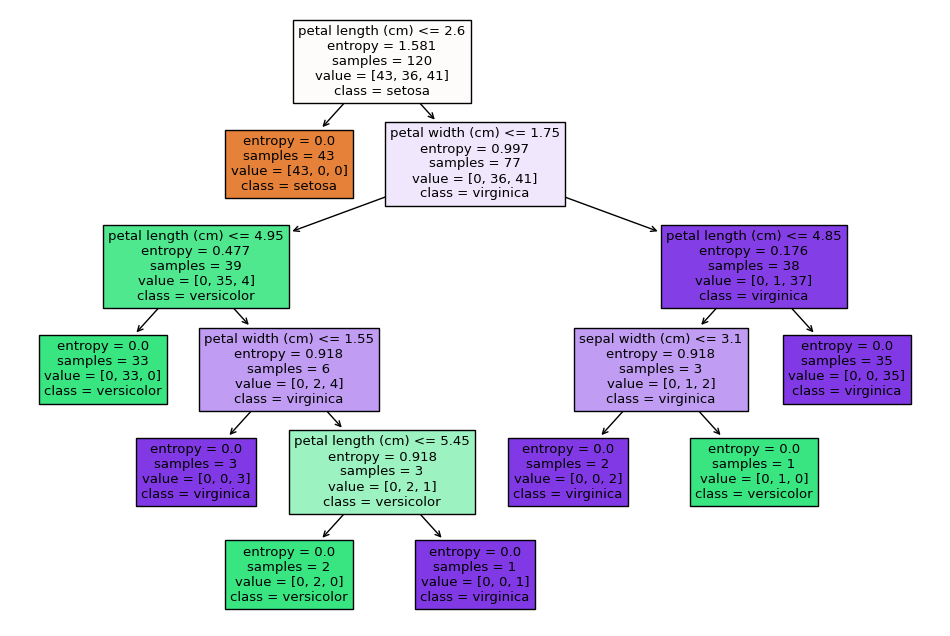

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
t = tree.plot_tree(model, feature_names=dataset.feature_names,class_names=dataset.target_names,label='all',filled=True)

## Classifying the MNIST dataset

How does the decision tree classifier perform on the MNIST dataset?

Since the algorithm bases its decision on just a few attributes, we wouldn't expect its performance to match that of other algorithms that use all attributes, such as k-nn.

In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = np.float32(x_train/255).reshape(x_train.shape[0],-1)
x_test = np.float32(x_test/255).reshape(x_test.shape[0],-1)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model = DecisionTreeClassifier(criterion='entropy')
model = model.fit(x_train, y_train)
pred = model.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print(f'Accuracy {accuracy:.4}')
cm = confusion_matrix(y_test, pred)
print(cm)

Accuracy 0.8878
[[ 919    0    6    3    2   22    7    6    8    7]
 [   0 1102    7    3    1    9    3    3    6    1]
 [   8    2  904   24   13   12   16   21   27    5]
 [   6    7   25  863    1   40    8   19   21   20]
 [   7    4   17    8  861    4   15   13   18   35]
 [  10    4    8   32    8  754   26    2   26   22]
 [  15    5    8    5   21   21  860    6   13    4]
 [   2    6   32   17    9    4    2  933    5   18]
 [   7    8   19   36   19   25   14    8  810   28]
 [   8    2    9   19   37   19    4   21   18  872]]


In [ ]:
model = DecisionTreeClassifier(criterion='entropy', splitter='random')
model = model.fit(x_train, y_train)
pred = model.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print(f'Accuracy {accuracy:.4}')
cm = confusion_matrix(y_test, pred)
print(cm)

Accuracy 0.8872
[[ 915    2   12    3    5   13   11    2    8    9]
 [   2 1099    4    7    1    2    5    5    6    4]
 [   8    8  907   17   10   11   15   24   18   14]
 [   7    2   21  868    5   35    4   18   26   24]
 [   4    4   10    8  870    8   18    5   12   43]
 [  11    6    4   40    5  759   20    8   23   16]
 [  14    5   12    4   18   20  857    1   22    5]
 [   1    6   28   15    5    3    4  933    8   25]
 [   9    7   23   30   23   28   28    6  798   22]
 [   5    7   13   18   42   17    3   22   16  866]]


In [ ]:
model = DecisionTreeClassifier(criterion='gini')
model = model.fit(x_train, y_train)
pred = model.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print(f'Accuracy {accuracy:.4}')
cm = confusion_matrix(y_test, pred)
print(cm)

Accuracy 0.8754
[[ 912    1    8    7    7   16   11    3   10    5]
 [   1 1092    7    5    1    6    8    4   10    1]
 [  16   10  884   34   11   12   10   25   20   10]
 [   9    3   31  863    7   42    4    7   26   18]
 [  10    3    6    6  862    8   17   11   20   39]
 [  14    9    5   44    7  742   25    4   22   20]
 [  17    3    9    9   21   20  843    2   27    7]
 [   2   13   26   18    4    6    1  925    7   26]
 [  10    8   29   41   21   36   16    8  778   27]
 [  15    4   10   20   43   13    4   23   24  853]]


In [ ]:
train_acc = []
acc = []
max_depths = []
leaves = []
for m in  np.arange(1,30):
  print('max_depth =',m)
  model = DecisionTreeClassifier(criterion='entropy',max_depth=m)
  model = model.fit(x_train, y_train)

  pred = model.predict(x_train)
  accuracy = accuracy_score(y_train, pred)
  print(f'Training accuracy {accuracy:.4}')
  train_acc.append(accuracy)
  pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, pred)
  print(f'Test set accuracy {accuracy:.4}')
  print('Actual leaves:',model.get_n_leaves())
  acc.append(accuracy)
  leaves.append(model.get_n_leaves())
  max_depths.append(m)
  if train_acc[-1]==1:
    break



max_depth = 1
Training accuracy 0.2041
Test set accuracy 0.206
Actual leaves: 2
max_depth = 2
Training accuracy 0.3367
Test set accuracy 0.3398
Actual leaves: 4
max_depth = 3
Training accuracy 0.4881
Test set accuracy 0.4918
Actual leaves: 8
max_depth = 4
Training accuracy 0.612
Test set accuracy 0.623
Actual leaves: 16
max_depth = 5
Training accuracy 0.6933
Test set accuracy 0.6995
Actual leaves: 32
max_depth = 6
Training accuracy 0.7592
Test set accuracy 0.7568
Actual leaves: 64
max_depth = 7
Training accuracy 0.8017
Test set accuracy 0.7985
Actual leaves: 128
max_depth = 8
Training accuracy 0.8465
Test set accuracy 0.836
Actual leaves: 254
max_depth = 9
Training accuracy 0.8806
Test set accuracy 0.861
Actual leaves: 494
max_depth = 10
Training accuracy 0.9122
Test set accuracy 0.8717
Actual leaves: 912
max_depth = 11
Training accuracy 0.9416
Test set accuracy 0.8808
Actual leaves: 1501
max_depth = 12
Training accuracy 0.9665
Test set accuracy 0.8835
Actual leaves: 2137
max_depth = 1

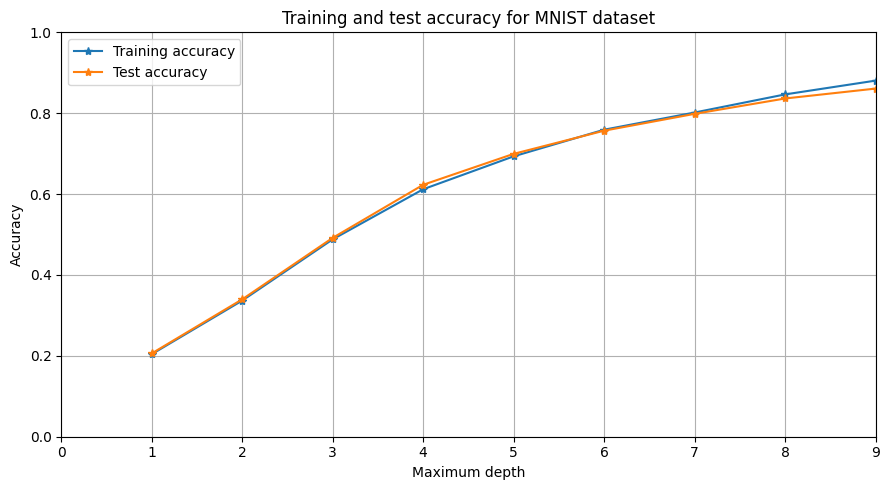

In [ ]:
fig0, ax0 = plt.subplots(figsize=(9,5))
ax0.set_title('Training and test accuracy for MNIST dataset')
plt.grid(True)

ax0.plot(max_depths,train_acc, label='Training accuracy', marker='*')
ax0.plot(max_depths,acc, label='Test accuracy',  marker='*')

ax0.legend(loc='upper left')
ax0.set_xlim(0,max_depths[-1])
ax0.set_ylim(0,1)
ax0.set_xlabel('Maximum depth')
ax0.set_ylabel('Accuracy')
fig0.tight_layout()


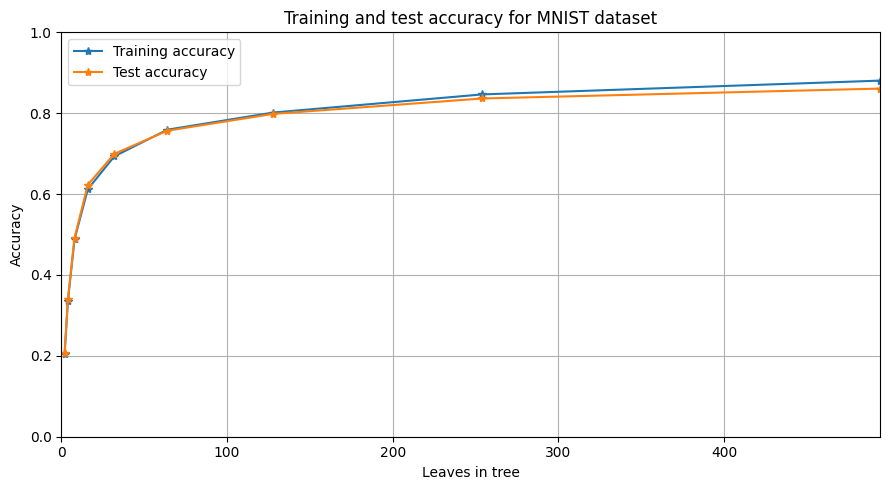

In [ ]:
fig0, ax0 = plt.subplots(figsize=(9,5))
ax0.set_title('Training and test accuracy for MNIST dataset')
plt.grid(True)

ax0.plot(leaves,train_acc, label='Training accuracy', marker='*')
ax0.plot(leaves,acc, label='Test accuracy',  marker='*')

ax0.legend(loc='upper left')
ax0.set_xlim(0,leaves[-1])
ax0.set_ylim(0,1)
ax0.set_xlabel('Leaves in tree')
ax0.set_ylabel('Accuracy')
fig0.tight_layout()

In [ ]:
train_acc = []
acc = []
max_leaves = []
m = 2
while True:
  print('max_leaves =',m)
  model = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=m)
  model = model.fit(x_train, y_train)

  pred = model.predict(x_train)
  accuracy = accuracy_score(y_train, pred)
  print(f'Training accuracy {accuracy:.4}')
  train_acc.append(accuracy)
  pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, pred)
  print(f'Test set accuracy {accuracy:.4}')
  acc.append(accuracy)
  max_leaves.append(m)
  print('Actual leaves:',model.get_n_leaves())
  if train_acc[-1]==1:
    break
  m = m*3//2


max_leaves = 2
Training accuracy 0.2041
Test set accuracy 0.206
Actual leaves: 2
max_leaves = 3
Training accuracy 0.2772
Test set accuracy 0.2805
Actual leaves: 3
max_leaves = 4
Training accuracy 0.3367
Test set accuracy 0.3398
Actual leaves: 4
max_leaves = 6
Training accuracy 0.4213
Test set accuracy 0.429
Actual leaves: 6
max_leaves = 9
Training accuracy 0.5205
Test set accuracy 0.527
Actual leaves: 9
max_leaves = 13
Training accuracy 0.5901
Test set accuracy 0.6032
Actual leaves: 13
max_leaves = 19
Training accuracy 0.6513
Test set accuracy 0.664
Actual leaves: 19
max_leaves = 28
Training accuracy 0.6927
Test set accuracy 0.7008
Actual leaves: 28
max_leaves = 42
Training accuracy 0.7258
Test set accuracy 0.7272
Actual leaves: 42
max_leaves = 63
Training accuracy 0.7637
Test set accuracy 0.7637
Actual leaves: 63
max_leaves = 94
Training accuracy 0.7934
Test set accuracy 0.793
Actual leaves: 94
max_leaves = 141
Training accuracy 0.8207
Test set accuracy 0.8178
Actual leaves: 141
max_l

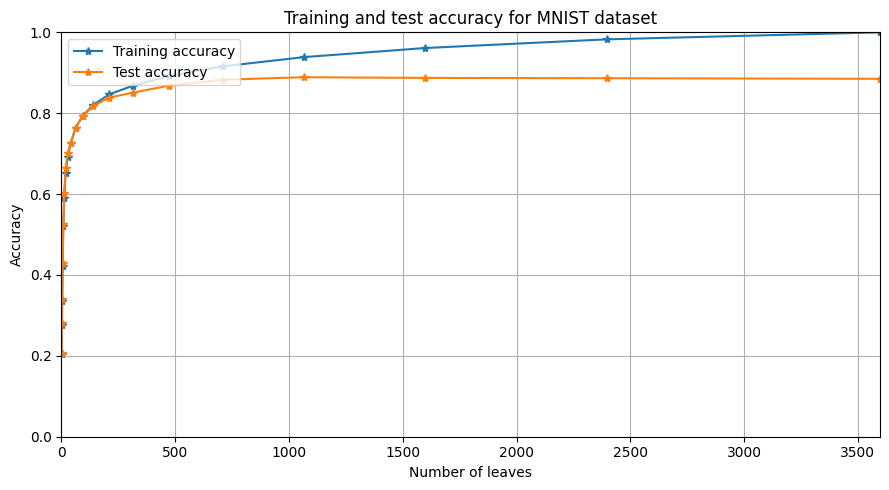

In [ ]:
fig0, ax0 = plt.subplots(figsize=(9,5))
ax0.set_title('Training and test accuracy for MNIST dataset')
plt.grid(True)

ax0.plot(max_leaves,train_acc, label='Training accuracy', marker='*')
ax0.plot(max_leaves,acc, label='Test accuracy',  marker='*')

ax0.legend(loc='upper left')
ax0.set_xlim(0,max_leaves[-1])
ax0.set_ylim(0,1)
ax0.set_xlabel('Number of leaves')
ax0.set_ylabel('Accuracy')
fig0.tight_layout()